In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']


In [ ]:
vocab_size = 100
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[52, 82], [58, 32], [56, 90], [96, 32], [66], [47], [75, 90], [13, 58], [75, 32], [98, 24, 82, 29]]


In [ ]:
# make your features same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

ind_vars = pad_sequences(encoded_docs)

In [ ]:
ind_vars

array([[ 0,  0, 52, 82],
       [ 0,  0, 58, 32],
       [ 0,  0, 56, 90],
       [ 0,  0, 96, 32],
       [ 0,  0,  0, 66],
       [ 0,  0,  0, 47],
       [ 0,  0, 75, 90],
       [ 0,  0, 13, 58],
       [ 0,  0, 75, 32],
       [98, 24, 82, 29]], dtype=int32)

In [ ]:
ind_vars.shape[1]

4

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

max_words = np.max(ind_vars) # grabs the largest encoded value

model = Sequential()
model.add(Embedding(max_words, 100, input_length=ind_vars.shape[1]))
model.add(SimpleRNN(32))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            9800      
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 14,329
Trainable params: 14,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd

dodgers = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Dodgers.csv')

In [ ]:
dodgers.head(20)

,datetime,cars
0,4/10/2005 0:00,-1
1,4/10/2005 0:05,-1
2,4/10/2005 0:10,-1
3,4/10/2005 0:15,-1
4,4/10/2005 0:20,-1
5,4/10/2005 0:25,-1
6,4/10/2005 0:30,-1
7,4/10/2005 0:35,-1
8,4/10/2005 0:40,-1
9,4/10/2005 0:45,-1


In [ ]:
dodgers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  50400 non-null  object
 1   cars      50400 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 787.6+ KB


In [ ]:
dodgers['datetime'] = pd.to_datetime(dodgers['datetime'])
dodgers.head()

,datetime,cars
0,2005-04-10 00:00:00,-1
1,2005-04-10 00:05:00,-1
2,2005-04-10 00:10:00,-1
3,2005-04-10 00:15:00,-1
4,2005-04-10 00:20:00,-1


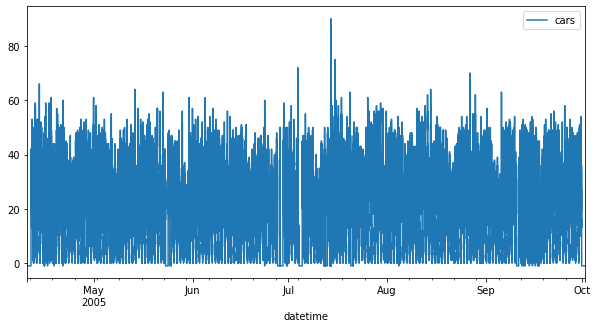

In [ ]:
dodgers.plot(x='datetime', y='cars', figsize=(10,5))

In [ ]:
dodgers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  50400 non-null  datetime64[ns]
 1   cars      50400 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 787.6 KB


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dodgers['cars'], test_size=0.2, shuffle=False)

In [ ]:
train.shape

(40320,)

In [ ]:
train

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
40315    12
40316    12
40317     7
40318     6
40319     3
Name: cars, Length: 40320, dtype: int64

In [ ]:
def convert_data(data, step):
  X, Y = [], []
  # X = []
  # Y = []
  for i in range(len(data)-step):
    d = i + step
    X.append(data[i:d,])
    Y.append(data[d:d+step,])

  return np.array(X), np.array(Y)

In [ ]:
step = 3
X_train, y_train = convert_data(train.values, step)
X_test, y_test = convert_data(test.values, step)


In [ ]:
y_test[0]

array([10, 10,  8])

In [ ]:
# cnn
# (img_width, img_height, n_channels)

In [ ]:
X_train[-1]

array([[12,  7,  6]])

In [ ]:
y_train[-1]

array([3])

In [ ]:
train.tail(5)

40315    12
40316    12
40317     7
40318     6
40319     3
Name: cars, dtype: int64

In [ ]:
y_train[-2]

6

In [ ]:
X_train.shape

(40317, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# n_rows, num_features, step_size
X_train.shape

(40317, 1, 3)

In [ ]:
X_test.shape

(10077, 1, 3)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1],X_train.shape[2]), activation="relu")) # input_shape=(n_features, n_steps)
model.add(SimpleRNN(units=32, activation="relu")) # input_shape=(n_features, n_steps)
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse', 'mae'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 1,443
Trainable params: 1,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16)

ValueError: ignored